<h1><center><strong><font color="chillipepper">Lab Session 1: An Introduction to Textual Data</font></strong></center></h1>
<h3><center><font color="blue"><strong>Student Version</strong></font></center></h3>


------------------------

# Overview

Before machine learning algorithms, NLP is all about data: data types, data distribution, data preparation, data representation.

⚠️ Follow the **TODO** to know when you need to code something. 
Sometimes, the expected output is still there to help you understand what you need to do. ⚠️

## Course takeaways

- The Why of NLP
- What is NLP ? the four challenges of NLP
- NLP in two pipelines
- Data exploration and preparation

## Lab session Prerequisites

- Python 
- Pandas 

For those not familiar with pandas https://pandas.pydata.org/docs/getting_started/index.html

## Lab session in a nutshell 

- First step with a textual dataset 
- Basic Tokenization (Word Segmentation) of a dataset 
- Compute Vocabulary and Zipf's law
- Introduction to Regex 
- A basic comparison of two datasets
- Hands on some processing tools (POS, NER, parsing) 
- A glimpse of topic models 

## Resources: 

- NLTK: https://www.nltk.org/api/nltk.tokenize.html 
- PANDAS: https://pandas.pydata.org/docs/getting_started/index.html
- SPACY: https://spacy.io/usage/spacy-101 

## Databases: 

We will use the following databases:
1. [BBC News Classification dataset](https://www.kaggle.com/c/learn-ai-bbc/overview): a corpus that we will download from our gitlab (so you don't have to register to kaggle) and extract manually
2. [Amazon Review dataset](https://huggingface.co/datasets/amazon_reviews_multi): a multilingual corpus that we will retrieve from the [Datasets](https://huggingface.co/datasets) library

## Tasks

### 1. Basic preprocessing
- [ ] Open the database. Generate simple statistics about the articles. How many unique articles are there? What is the mean length of articles (considering characters)? 

- [ ] Generate simple statistics about the annotators' data for each article. Do the annotations seem consistent? 

### 2. Word-level preprocessing
- [ ] Split the articles into list of words. How many different words are there in the vocabulary? 

- [ ] Split the articles into list of words using three different tokenizers from nltk. What is the difference in terms of number of words? What do you think has changed?

- [ ] Check if Zipf's law applies. 

### 3. Domain specificity and regex
- [ ] Use regex to retrieve numbers (ints, floats, %, years, ...) using a regex. 

- [ ] How many percent of characters are numbers (as defined above) in a given article? 

- [ ] Is there any relationship between the percentage of numbers in an article and the content length? 

### 4. Dataset Comparison
Merge datasets and compare some basic statistics

### 5. Classic NLP pipeline
- [ ] Re-tokenize using spacy

- [ ] Lemmatize using spacy

- [ ] POS tagging using spacy, plot the trees

- [ ] NER using spacy, give the amount of each entity type for a given title, and compare it to the title length. 

### 6. Topic Modelling
- Use Gensim's LDA to compute a topic model. 

- Use PyLDAvis to visualise the topic model. What are the different topic clusters?


# <font color="chillipepper">**Imports and Installation** 📂</font>

In [1]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
! pip3 install datasets

     |████████████████████████████████| 17.8 MB 669 kB/s eta 0:00:01
  Using cached pandas-2.0.3-cp38-cp38-macosx_10_9_x86_64.whl (11.7 MB)
     |████████████████████████████████| 395 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 7.2 MB/s eta 0:00:01
     |████████████████████████████████| 659 kB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 3.9 MB/s eta 0:00:011
     |████████████████████████████████| 10.5 MB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 296 kB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 172 kB 8.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.6 MB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 229 kB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 345 kB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 7.0 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 117 kB/s eta 0:00:01
     |████████████████████████████████| 233

In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

from functools import reduce
from operator import add
from termcolor import colored

ModuleNotFoundError: No module named 'pandas_profiling'

# <font color="chillipepper">**Data Download** 💾</font>

In [ ]:
! wget https://gitlab.com/gguibon/ensae-ml4nlp-storage/-/raw/master/bbc-news-data.zip
! unzip bbc-news-data.zip

--2022-02-25 08:08:37--  https://gitlab.com/gguibon/ensae-ml4nlp-storage/-/raw/master/bbc-news-data.zip
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1896286 (1.8M) [application/zip]
Saving to: ‘bbc-news-data.zip’

bbc-news-data.zip   100%[===================>]   1.81M  6.81MB/s    in 0.3s    

2022-02-25 08:08:38 (6.81 MB/s) - ‘bbc-news-data.zip’ saved [1896286/1896286]

Archive:  bbc-news-data.zip
  inflating: bbc-news-data.csv       


# <font color="chillipepper">**Data Basic Exploration** 📊</font>

We first start by opening the database and load it as a **Pandas dataframe**.

Documentation:
- https://pandas.pydata.org/docs/

In [4]:
df = pd.read_csv('./bbc-news-data.csv', sep='\t')
print("Shape:  {0}".format(df.shape))
df.head()

Shape:  (2225, 4)


,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


Our dataframe have the following columns:

### 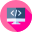 **TODO!** Print the number of different articles in the database.

Tip: You may need the `.unique()` function of Pandas.

In [10]:
len(df['content'].unique())

2092

### 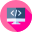 **TODO!** print the mean length (*i.e.* number of characters) of the `content` column

Tip: You may need the `.mean()` function of Pandas.

In [ ]:
df['content'].mean()

### 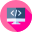 **TODO!** display the different article categories as a list

In [18]:
df['category'].unique().tolist()

['business', 'entertainment', 'politics', 'sport', 'tech']

### 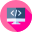 **TODO!** Display the repartition of the content lengths (characters) as an histogram.

Tip: See the `.hist()` function of Pandas.

In [19]:
# Repartition of the content lengths (characters)
%matplotlib inline

### 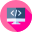 **TODO!** display the number of articles per `category`.

Tip: You may need the `.groupby()` function of Pandas.

In [39]:
# We check the number of article per category
to_print = df.groupby(["category"]).count()['filename']


### 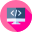 **TODO!** Display the histogram of the number of articles per category

<Axes: xlabel='category'>

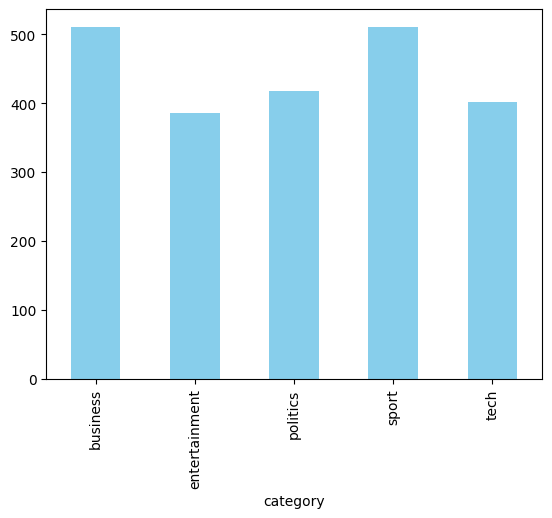

In [46]:
# And plot a histogram
to_print.plot(kind='bar', color='skyblue')

### 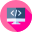 **TODO!** Let's add some basic information about the text: number of "words". Put them into new `title_len` and `content_len` columns. 

Tip: just split the text according to the spaces. You may need the `apply()` function from Pandas

In [47]:
# let's add some basic information about the text: number of "words" (here we only split by a space, a really naive approach)
df['content_len'] = df["content"].apply(lambda s: len(s.split()))
df['title_len'] = df["title"].apply(lambda s: len(s.split()))

In [48]:
df

,category,filename,title,content,content_len,title_len
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,415,6
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,379,5
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,258,6
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,400,6
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,260,5
...,...,...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...,414,6
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...,352,5
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...,1045,5
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...,374,5


Here you can see how to display a `ProfileReport()` from PandasProfiling.

Play with it and explore the interactive report.

In [49]:
# Let's create an automatic and interactive report of the BBC News dataset
profile = ProfileReport(df, title="BBC News", html={"style": {"full_width": True}})

NameError: name 'ProfileReport' is not defined

In [ ]:
profile.to_notebook_iframe()

### 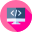 **TODO!** print the standard deviation for each article's title length `title_len` and content length `content_len`.

Tip: you may need the `.std()` function from Pandas

In [2]:
eval_cols = ["title_len", 'content_len']


### 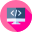 **TODO!** Complete the following code with your solution from previous TODO. This will display the plots for standard deviation distribution of `title_len` and `content_len`.

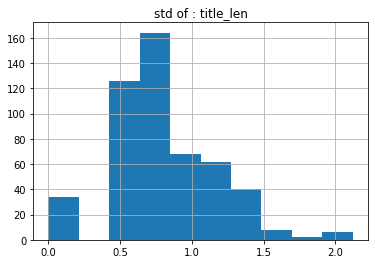

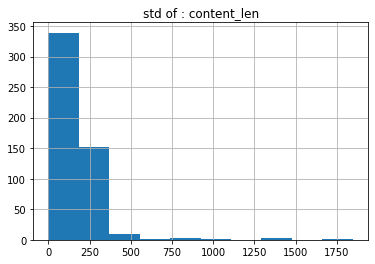

In [ ]:
import matplotlib.pyplot as plt

for col in eval_cols:
  plt.figure()
  plt.title("std of : {0}".format(col))
  # here goes the hist() generation code
  plt.plot()

# <font color="chillipepper">**Word-level Preprocessing**</font>

### 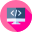 **TODO!** Split the content into list of words. How many different words are there in the vocabulary?

In [20]:
# List of words with separator = " "
arr = df.content.drop_duplicates().apply(lambda x: x.split(' ')).array
liste = []
for e in arr:
    liste += e
set_vocabulary = set(liste)
# Now we flatten the list of lists into a single level list. 
# put it into a set
# and get its length
len(set_vocabulary)

64779

In [17]:
len(vocabulary)

64779

In [19]:
# same for titles
arr = df.title.drop_duplicates().apply(lambda x: x.split(' ')).array
liste = []
for e in arr:
    liste += e
set_title = set(liste)
len(set_title)

4475

### 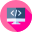 **TODO!** Split the content into list of words using three different tokenizers from nltk. What is the difference in terms of number of words? What do you think has changed?

In [31]:
# https://www.nltk.org/api/nltk.tokenize.html 
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import ToktokTokenizer
from nltk.tokenize import TweetTokenizer
tokenizers = [TreebankWordTokenizer(), ToktokTokenizer(), TweetTokenizer()]
for token in tokenizers: 
    print(token.tokenize(df.content.drop_duplicates()[0]))
    

['Quarterly', 'profits', 'at', 'US', 'media', 'giant', 'TimeWarner', 'jumped', '76', '%', 'to', '$', '1.13bn', '(', '£600m', ')', 'for', 'the', 'three', 'months', 'to', 'December', ',', 'from', '$', '639m', 'year-earlier.', 'The', 'firm', ',', 'which', 'is', 'now', 'one', 'of', 'the', 'biggest', 'investors', 'in', 'Google', ',', 'benefited', 'from', 'sales', 'of', 'high-speed', 'internet', 'connections', 'and', 'higher', 'advert', 'sales.', 'TimeWarner', 'said', 'fourth', 'quarter', 'sales', 'rose', '2', '%', 'to', '$', '11.1bn', 'from', '$', '10.9bn.', 'Its', 'profits', 'were', 'buoyed', 'by', 'one-off', 'gains', 'which', 'offset', 'a', 'profit', 'dip', 'at', 'Warner', 'Bros', ',', 'and', 'less', 'users', 'for', 'AOL.', 'Time', 'Warner', 'said', 'on', 'Friday', 'that', 'it', 'now', 'owns', '8', '%', 'of', 'search-engine', 'Google.', 'But', 'its', 'own', 'internet', 'business', ',', 'AOL', ',', 'had', 'has', 'mixed', 'fortunes.', 'It', 'lost', '464,000', 'subscribers', 'in', 'the', 'fo

If you look at the first 30 tokens, the `TweetTokenizer` is the only one to separate "bn" from "1.13" in "1.13bn".

### 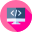 **TODO!** Check if Zipf's law applies.

Complete the following code.

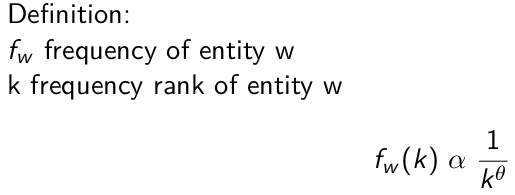

In [42]:
# This import allows you to count the occurrences of each different elements in a list
from collections import Counter
import matplotlib.pyplot as plt


occurrences = [{},{},{}]

tokenizers = [TreebankWordTokenizer(), ToktokTokenizer(), TweetTokenizer()]

def tdm(tokenizers): 
  for i in range(len(tokenizers)): 
    liste = []
    for e in df.content.drop_duplicates():
      liste += token.tokenize(e)
    for chaine in liste:
      if chaine in occurrences:
          occurrences[i][chaine] += 1
      else:
          occurrences[i][chaine] = 1
  

    
for tok in tdm(tokenizers):
  # get the counter of words
  # example usage: a = [1, 1, 2, 5, 6, 5]; print(Counter(a))

  # then use the following code to plot
  # Formating the counter object to a proper dataset
  d = pd.DataFrame(c, index=['occurrences']).transpose().reset_index()
  d.columns=['word', 'occurences']
  # Computing frequencies instead of occurences
  nb_total = d.occurences.sum()
  d['freq'] = d.occurences.apply(lambda x: x/nb_total)
  # Sorting by frequency, most frequent word at the top of the df
  d = d.sort_values('freq', ascending=False)
  plt.figure()
  plt.grid()
  plt.xscale('log')  # Using log scale
  plt.yscale('log')  # Using log scale
  plt.xlabel('log(rank)')
  plt.ylabel('log(frequency)')
  plt.title("Tokenizer : {0}".format(tok))
  x = list(range(d.shape[0]))
  plt.plot(x, d.freq)
  plt.show()

TypeError: 'NoneType' object is not iterable

In [43]:
tdm(tokenizers)

# <font color="chillipepper">**Domain specificity and regex**</font>


### 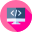 **TODO!** Use regex to retrieve numbers (ints, floats, %, years, ...) in article contents.


*Regex cheasheet* : see python's re module documentation https://docs.python.org/3/library/re.html  

*Other ressources* : 

- A good website to write and test regular expressions : 
https://regex101.com/
- A good game to learn regex : https://alf.nu/RegexGolf 


In [44]:
# See an example of a full article content:
print(df.content.iloc[0])

 Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.  The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.  Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL's existing customers for high-spe

In [59]:
import re
# Regular expression that matches any sequence of numbers:
nb = '[0-9]+' # retrieve all numbers : ([0-9] == from 0 to 9, and + allows multiple matches)
numbers = re.findall(r'\[0-9]+', df.content.iloc[0])


### 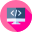 **TODO!** How many percent of characters are numbers (as defined above) in a given article?


In [ ]:
nb_percent_types = [''.join([t, '%']) for t in nb_types]
# code me

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ints%,floats%,percents%,years%,content
0,2.574257,2.811881,0.831683,0.633663,Quarterly profits at US media giant TimeWarne...
1,0.585849,0.675980,0.000000,0.360523,The dollar has hit its highest level against ...
2,0.922874,1.054713,0.000000,0.000000,The owners of embattled Russian oil giant Yuk...
3,3.168568,3.464301,1.098437,0.675961,British Airways has blamed high fuel prices f...
4,1.628664,2.084691,0.521173,0.260586,Shares in UK drinks and food firm Allied Dome...


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95fc5ba9d0>,
      dtype=object)

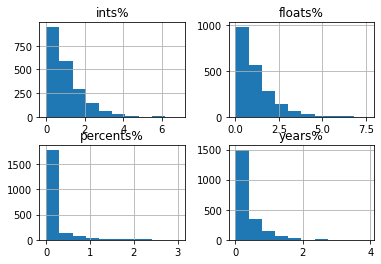

In [ ]:
df1[nb_percent_types].hist()

Compute these histograms for each category with the following code.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


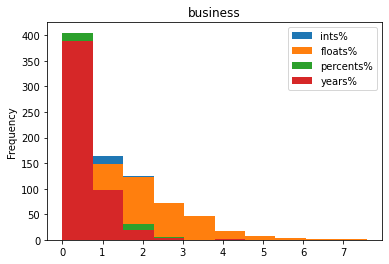

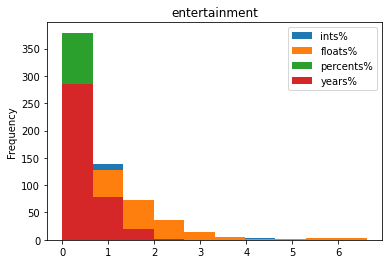

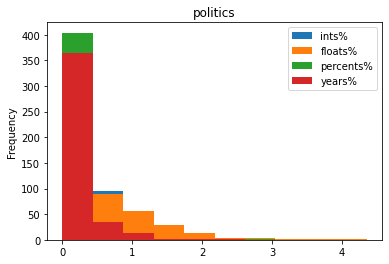

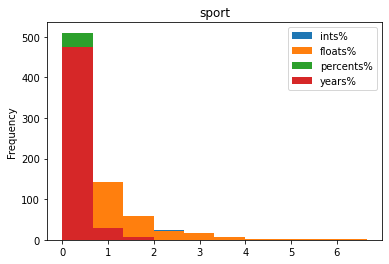

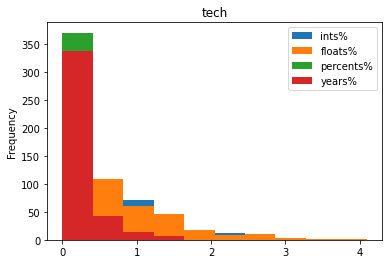

In [ ]:
categories = list(df.category.drop_duplicates().values)
for category in categories:
  # filter by category
  is_category = df['category']==category
  df1 = df[is_category]
  
  nb_percent_types = [''.join([t, '%']) for t in nb_types]

  # Your code here

  ax = df1[nb_percent_types].plot(kind='hist',subplots=False,sharex=True,sharey=True,title='%s' % (category))


### Is there any relationship between the percentage of numbers in an article and the content length?

Here is a way to apply custom explorations. Of course, you could also add a dedicated column and simply run again pandas profiling for a `ProfileReport(df)`

In [61]:
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, spearmanr
from warnings import filterwarnings
filterwarnings('ignore')

# Plotting the percentages against the corresponding log(citations)
df1['log_content_len'] = np.log(df1['content_len'].array)
for nb_type in nb_percent_types:
  # We will plot percents and years differently, as their scarcity creates a
  # matplotlib overflow when plotting a kde plot
  if nb_type in ['percents%', 'years%']:
    sns.jointplot(data=df1, x='log_content_len', y=nb_type)
    #pass
  else:
    sns.jointplot(data=df1, kind='kde', x='log_content_len', y=nb_type)#annotate(pearsonr)#
    plt.show()
  

NameError: name 'df1' is not defined

# <font color="chillipepper">**Multiple Dataset Comparison**</font>

Let's download the second dataset.

In [ ]:
from datasets import load_dataset

# Download the datasets
amazon = load_dataset('amazon_reviews_multi', split='train')
print(amazon)

No config specified, defaulting to: amazon_reviews_multi/all_languages
Reusing dataset amazon_reviews_multi (/root/.cache/huggingface/datasets/amazon_reviews_multi/all_languages/1.0.0/724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609)


Dataset({
    features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
    num_rows: 1200000
})


Now we transform the Hugging Face's `Dataset` object into a Pandas dataframe and retrieve the desired languages to reduce the size.

### 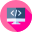 **TODO!** select only the english reviews.

In [ ]:
amazon_df = amazon.to_pandas()
# code me, do it in place for RAM saving

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
200000,en_0964290,product_en_0740675,reviewer_en_0342986,1,Arrived broken. Manufacturer defect. Two of th...,I'll spend twice the amount of time boxing up ...,en,furniture
200001,en_0690095,product_en_0440378,reviewer_en_0133349,1,the cabinet dot were all detached from backing...,Not use able,en,home_improvement
200002,en_0311558,product_en_0399702,reviewer_en_0152034,1,I received my first order of this product and ...,The product is junk.,en,home
200003,en_0044972,product_en_0444063,reviewer_en_0656967,1,This product is a piece of shit. Do not buy. D...,Fucking waste of money,en,wireless
200004,en_0784379,product_en_0139353,reviewer_en_0757638,1,went through 3 in one day doesn't fit correct ...,bubble,en,pc
...,...,...,...,...,...,...,...,...
799995,fr_0907472,product_fr_0369223,reviewer_fr_0155780,5,Très jolies boucles! Très belle qualité ! Elle...,Top,fr,jewelry
799996,fr_0345478,product_fr_0271680,reviewer_fr_0933970,5,Superbe. Ultra rapide. Tres bel écran. Il y a ...,Confirme à sa reputation de smartphone le plus...,fr,wireless
799997,fr_0195162,product_fr_0132362,reviewer_fr_0820277,5,facile d'utilisation mais un peu lourd,pratique,fr,kitchen
799998,fr_0250763,product_fr_0966190,reviewer_fr_0485706,5,livré vite et bon produit,livré vite et bon produit,fr,beauty


## Compare BBC News and Amazon Reviews datasets (English only)

In [ ]:
# let's save some RAM
del amazon_df

### 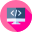 **TODO!** Compare the number of article per category in BBCNews and Amazon

In [ ]:
# number of article per category


{'business': 510, 'entertainment': 386, 'politics': 417, 'sport': 511, 'tech': 401}
{'apparel': 15951, 'automotive': 7506, 'baby_product': 3150, 'beauty': 12091, 'book': 3756, 'camera': 2139, 'digital_ebook_purchase': 6749, 'digital_video_download': 1364, 'drugstore': 11730, 'electronics': 6186, 'furniture': 2984, 'grocery': 4730, 'home': 17679, 'home_improvement': 7136, 'industrial_supplies': 1994, 'jewelry': 2747, 'kitchen': 10382, 'lawn_and_garden': 7327, 'luggage': 1328, 'musical_instruments': 1102, 'office_product': 5521, 'other': 13418, 'pc': 6401, 'personal_care_appliances': 75, 'pet_products': 7082, 'shoes': 5197, 'sports': 8277, 'toy': 8745, 'video_games': 775, 'watch': 761, 'wireless': 15717}


### 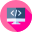 **TODO!** Compare the mean number of character per article content and title for both BBC News and Amazon

In [ ]:
# mean content length (characters)
print('Mean number of character per element')
# code me

Mean number of character per element
BBCNews 2232.1692160611856
Amazon  179.28516843340387


In [ ]:
# mean title length (characters)
print('Mean number of character per title')
# code me

Mean number of character per title
BBCNews 31.329198473282442
Amazon  30.306544110155308


### 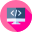 **TODO!** Concatenate both dataframes into one, with the following mapping.


In [ ]:
columns_to_keep = ['review_id', 'review_body', 'review_title', 'product_category']
columns_newnames = {'review_id':'filename','review_body':'content','review_title':'title', 'product_category':'category'}
bbcamazon = # code me

In [ ]:
bbcamazon

,category,filename,title,content,title_len,content_len
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,6.0,421.0
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,5.0,383.0
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,6.0,262.0
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,6.0,406.0
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,5.0,264.0
...,...,...,...,...,...,...
202220,shoes,en_0046316,Nice and fit as advertised,"Cute slippers, my MIL loved them.",NaN,NaN
202221,toy,en_0956024,good to keep the kids engaged,My 6 year old likes this and keeps him engaged...,NaN,NaN
202222,wireless,en_0589358,This works,Replaced my battery with it. Works like new.,NaN,NaN
202223,industrial_supplies,en_0970602,Well made.,"I like them, holding up well.",NaN,NaN


In [ ]:
# let's save some RAM
del df
del amazon_df_en

### 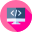 **TODO!** Add columns `content_len` and `title_len` dedicated to store the content length from better tokenized text 

Tip: use `TweetTokenizer()` from nltk and `.apply()` function from Pandas

In [ ]:
from nltk.tokenize import TweetTokenizer

# Apply the tokenizer to the text and create a column dedicated to it. Same goes for the title.
tokenizer = TweetTokenizer()
# Code me

In [ ]:
# Replace text len using the tokenized values
bbcamazon['content_len_tokenized'] = # code me
# code me

In [ ]:
# Recalculate the title_len and content_len for all elements
# code me

### 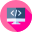 **TODO!** Add a `source` column specifying whether an article is from Amazon or BBC News

In [ ]:
# Let's add an indication about the source using the filename type
bbcamazon['source'] = # code me

Now let's have a glimpse of our concatenated and enriched data.

In [ ]:
bbcamazon.head()

,category,filename,title,content,title_len,content_len,content_tokenized,title_tokenized,content_len_tokenized,title_len_tokenized,source
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,6,421,"[Quarterly, profits, at, US, media, giant, Tim...","[Ad, sales, boost, Time, Warner, profit]",486,6,bbcnews
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,5,383,"[The, dollar, has, hit, its, highest, level, a...","[Dollar, gains, on, Greenspan, speech]",418,5,bbcnews
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,6,262,"[The, owners, of, embattled, Russian, oil, gia...","[Yukos, unit, buyer, faces, loan, claim]",289,6,bbcnews
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,6,406,"[British, Airways, has, blamed, high, fuel, pr...","[High, fuel, prices, hit, BA's, profits]",472,6,bbcnews
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,5,264,"[Shares, in, UK, drinks, and, food, firm, Alli...","[Pernod, takeover, talk, lifts, Domecq]",302,5,bbcnews


Can you see the difference? A good tokenization can take into account several factors such as contractions: `I'm` should become `I am`. Hence, `content_len_tokenized` should almost always be higher than `content_len`.

### 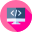 **TODO!** Check Zipf's law for BBC News and Amazon Reviews.

In [ ]:
sources = bbcamazon.source.drop_duplicates().tolist()
sources

['bbcnews', 'amazon']

Counter({'the': 44534, '.': 40865, ',': 35444, 'to': 24546, '"': 20421, 'of': 19789, 'and': 17972, 'a': 17214, 'in': 16432, 'is': 8525, 'for': 8488, 'The': 8008, 'that': 7801, 'said': 7244, 'on': 7154, 'was': 6021, 'be': 5772, 'it': 5351, 'with': 5124, 'has': 4949, 'have': 4735, 'as': 4638, 'will': 4416, 'are': 4380, 'at': 4341, 'by': 4337, 'he': 4225, '-': 3818, 'from': 3474, 'not': 3401, 'I': 3250, 'Mr': 3004, 'his': 2827, 'an': 2687, 'but': 2634, 'which': 2582, 'had': 2572, 'would': 2568, 'been': 2470, 'they': 2445, 'their': 2345, 'this': 2237, '(': 2203, 'more': 2199, 'were': 2192, ')': 2184, 'its': 2176, 'also': 2102, 'who': 2037, '%': 1956, 'up': 1930, 'people': 1855, 'But': 1787, 'about': 1749, 'we': 1721, 'It': 1642, ':': 1642, 'or': 1616, "'": 1614, 'than': 1600, 'year': 1575, 'out': 1569, 'He': 1556, 'after': 1539, 'can': 1522, 'could': 1492, 'one': 1478, 'US': 1462, 'new': 1459, '£': 1392, 'all': 1342, 'over': 1340, 'there': 1239, 'last': 1233, 'first': 1233, '$': 1203, 'you

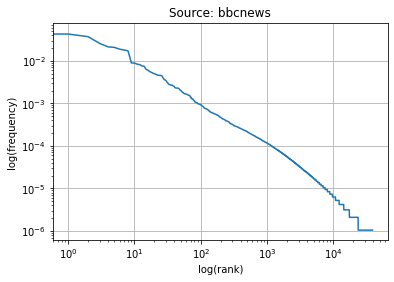

Counter({'.': 471725, 'the': 293036, 'I': 218968, 'and': 182785, 'to': 174173, ',': 171711, 'it': 167941, 'a': 159775, 'is': 98764, 'for': 89896, 'of': 87605, 'but': 69215, 'in': 68738, 'this': 68325, 'my': 67247, 'was': 66889, 'not': 66201, '!': 56362, 'on': 55527, 'that': 53103, 'with': 49286, 'The': 48703, 'have': 45206, '’': 44934, 'as': 37738, 'are': 37566, 'so': 34092, 'It': 33883, 'you': 33545, 'like': 30704, 'they': 30506, 'very': 30381, 'be': 29631, 'one': 28849, 'them': 26184, 'good': 23615, 'product': 23243, 'would': 23089, 'had': 22800, 'This': 22781, 'out': 22537, 'just': 22507, 'great': 22483, 'use': 21724, 'all': 21428, 'up': 21394, 't': 21328, 'at': 20858, 'these': 18934, 'get': 18831, 'or': 18627, 'will': 18252, 'me': 18240, 'well': 18080, 'when': 18057, 'from': 17198, 'if': 16946, 'than': 16838, 'work': 16505, 'only': 15997, 'more': 15559, 'can': 15442, 'time': 15361, 'too': 15258, 'off': 15142, 'really': 14981, 'were': 14969, 'because': 14596, 'quality': 14068, '...'

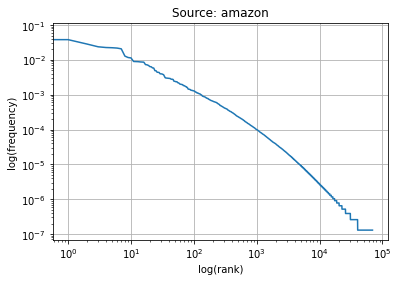

In [ ]:
for source in sources:
  # plot the curves

### 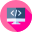 **TODO!** Create a report of the concatenated dataframe

Tip: to save some RAM, create a mini dataframe ignoring text columns such as `content_tokenized`. You may use the `.drop()` function

Now let's create a report again. As our dataset is bigger, the iframe creation should take too much time. Let's use a version without the tokenized content and tokenized title.

In [ ]:
# We remove the text columns because generating the iframe takes a lot of time and RAM
mini_bbcamazon = # code me

In [ ]:
# Let's create an automatic and interactive report of the BBCAmazon dataframe
profile = ProfileReport(mini_bbcamazon, title="BBC News x Amazon", html={"style": {"full_width": True}})

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Take a look at the correlations, which correlation metric is the best one to differenciate the different content and title lengths?

The Kendall's correlation shows a slight difference between content tokenized and not tokenized based on their lengths.

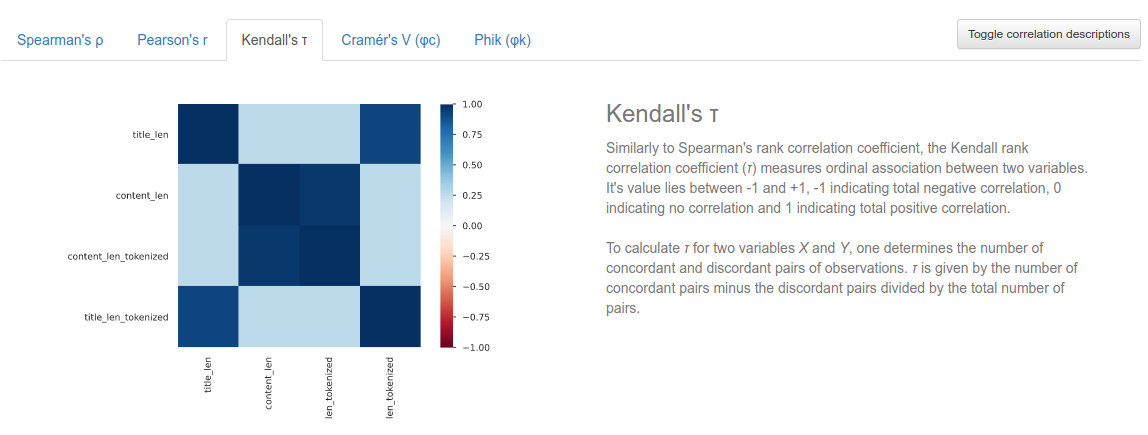

In [ ]:
# let's save some RAM
del mini_bbcamazon


# <font color="chillipepper">**Topic Modelling**</font>

In this part you don't need to do anything. Just analyze the following code as an example given to you.


### Use Gensim's LDA to compute a topic model. 


In [ ]:
from gensim.models import LdaModel
from gensim import corpora
import nltk
from string import punctuation

nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))
to_be_removed = list(en_stop) + list(punctuation)

tok = TreebankWordTokenizer()
# Tokenizing + removing stopwords
text_data = list(bbcamazon[bbcamazon.source=='bbcnews'].content.apply(lambda x: list(filter(lambda a: a.lower() not in to_be_removed,tok.tokenize(x)))).array)
print(text_data[0])
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

ldamodel = LdaModel(corpus, id2word=dictionary, num_topics=4)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['Quarterly', 'profits', 'US', 'media', 'giant', 'TimeWarner', 'jumped', '76', '1.13bn', '£600m', 'three', 'months', 'December', '639m', 'year-earlier.', 'firm', 'one', 'biggest', 'investors', 'Google', 'benefited', 'sales', 'high-speed', 'internet', 'connections', 'higher', 'advert', 'sales.', 'TimeWarner', 'said', 'fourth', 'quarter', 'sales', 'rose', '2', '11.1bn', '10.9bn.', 'profits', 'buoyed', 'one-off', 'gains', 'offset', 'profit', 'dip', 'Warner', 'Bros', 'less', 'users', 'AOL.', 'Time', 'Warner', 'said', 'Friday', 'owns', '8', 'search-engine', 'Google.', 'internet', 'business', 'AOL', 'mixed', 'fortunes.', 'lost', '464,000', 'subscribers', 'fourth', 'quarter', 'profits', 'lower', 'preceding', 'three', 'quarters.', 'However', 'company', 'said', 'AOL', "'s", 'underlying', 'profit', 'exceptional', 'items', 'rose', '8', 'back', 'stronger', 'internet', 'advertising

### Use PyLDAvis to visualise the topic model. What are the different topic clusters?


In [ ]:
!pip install pyLDAvis


In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

lda_display = gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(lda_display)

Topic modelling not very relevant here.